In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
from sklearn import tree

In [7]:
train_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)

In [8]:
train_data.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [9]:
test_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)

In [10]:
test_data.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [12]:
X_train = train_data.drop(columns=['species'])
y_train = train_data['species']

X_test = test_data.drop(columns=['species'])
y_test = test_data['species']

In [30]:
np.random.seed(0)

max_depth_values = range(1,100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth],
                                   'train_score' : [train_score],
                                    'test_score' : [test_score]
                                   })
    scores_data = scores_data.append(temp_score_data)

In [31]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


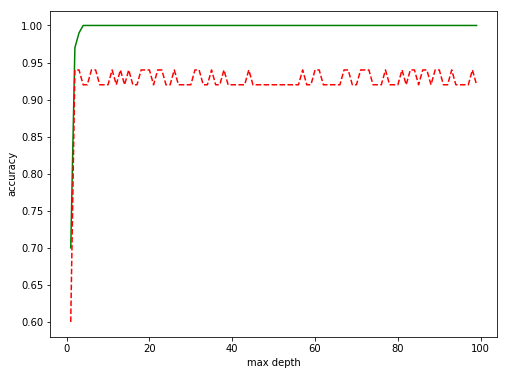

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

ax.plot(scores_data.max_depth, scores_data.train_score, 'g-', label='train')
ax.plot(scores_data.max_depth, scores_data.test_score, 'r--', label='test')

ax.set_xlabel('max depth')
ax.set_ylabel('accuracy')
plt.show()